In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# from plot import plot
import torch

# Define the differential equation
def van_der_pol_oscillator(t, x, mu):
    return mu * (1 - x**2) * np.sin(t)


# Parameters
n_points = 100000
t_span = (0,20)

experiment_config = {'mu':7.0,  # Nonlinearity parameter
                        'x0': [0.5],  # Initial condition
                        't_span' :  t_span,  # Time interval for the solution
                        'N_points' : n_points,
                        't_eval' : np.linspace(t_span[0], t_span[1], n_points)  # Time points where the solution is evaluated
}

plot_config = {'T': 10000,
                'N': 17,
                'batch_size': 1,
                'experiment' : 'van_der_pool',
                'filename' : f'experiments/van_der_pool.jpg'}

# Solve the differential equation
solution = solve_ivp(van_der_pol_oscillator, experiment_config['t_span'], experiment_config['x0'], args=(experiment_config['mu'],), 
                        t_eval=experiment_config['t_eval'], method='RK45')
test_data = torch.Tensor((solution['y'])[0])

# print(plot(test_data, plot_config, return_losses=True))

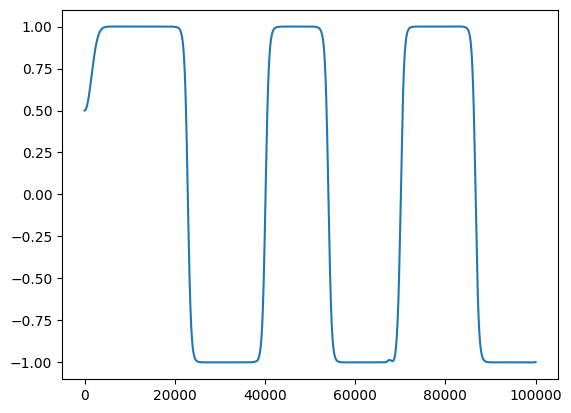

In [2]:
plt.plot(test_data)

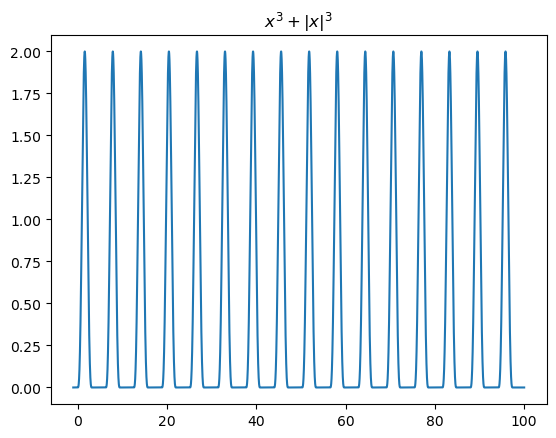

Text(0.5, 1.0, 'bound')

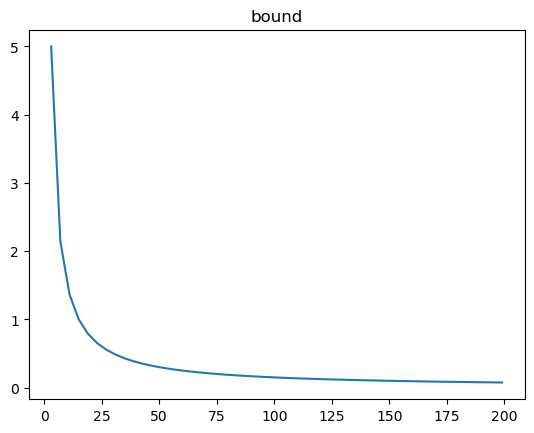

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from icl_learning.config import load_configs
from model.hippo import HiPPO_FouT, HiPPO_LegT
from torch.utils.data import DataLoader
from icl_learning.train import get_datasets
from tqdm import tqdm

config = load_configs()

x = np.linspace(-1,100,100000)

def f(x):
    # sines = [np.random.randn(1)*np.sin(i*np.pi*x) for i in range(20)]
    # return np.array(np.sum(sines, axis=0))
    return np.sin(x)**3 + np.abs(np.sin(x))**3
    # return np.sin(x)
    # return x * 20000

y_np = f(x)
y = torch.tensor(y_np, dtype=torch.float32)
# y = test_data
plt.plot(x, y)
plt.title("$x^3 + |x|^3$")
plt.show()

L = 15

N = np.arange(3, 202, 4)

bound = L/N

plt.plot(N, bound)
plt.title("bound")

In [2]:
print(y.shape)

torch.Size([100000])


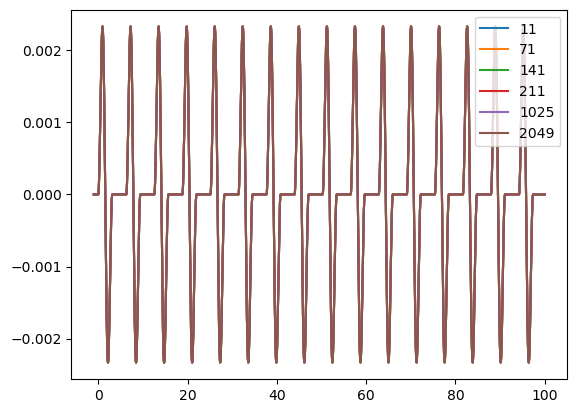

In [14]:
#for dt in [0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]:
dt = 0.0000000000001

a = 0
b=1
errors = []
#for i in np.arange(1, 80, 10):
for i in [11, 71, 141, 211, 1025, 2049, 10001]:
    model = HiPPO_FouT(N=i, dt = dt, teacher_ratio=1, trainable=False)
    # prediction = np.array(model(y.reshape(1,-1))).reshape(-1,)
    prediction = np.array(model(y)).reshape(-1,)
    # print(prediction.shape)
    error = np.abs(y[a+1:-b] - prediction[a:-1-b])
    errors.append(error)
    plt.plot(x[a+1:-b], y[a+1:-b] - prediction[a:-1-b], label = f"{i}")
plt.legend()
plt.show()

In [1]:
for i in np.arange(1,16,4):
    model = HiPPO_FouT(N=i, dt = 0.01, teacher_ratio=1, trainable=False)
    print(model.A, model.B, model.C_discr, model.D_discr)

NameError: name 'np' is not defined

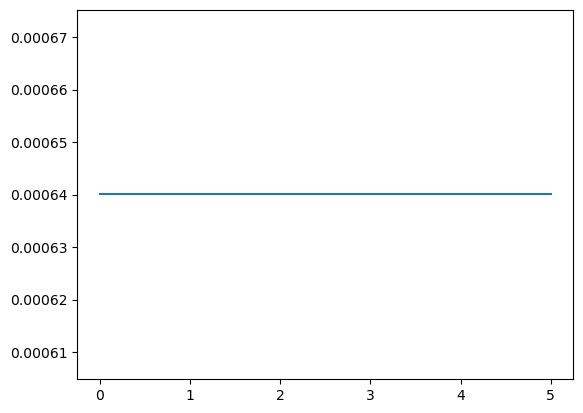

In [15]:
plt.plot(np.mean(np.array(errors), axis=1))

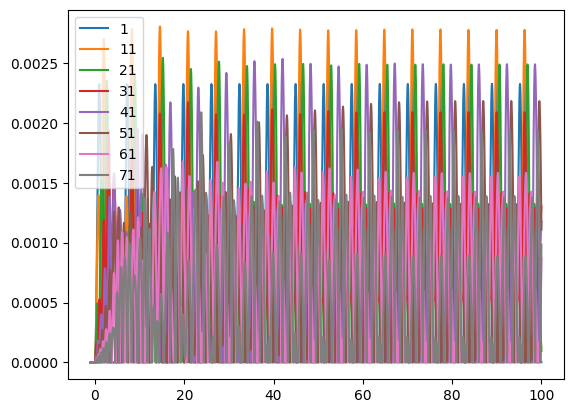

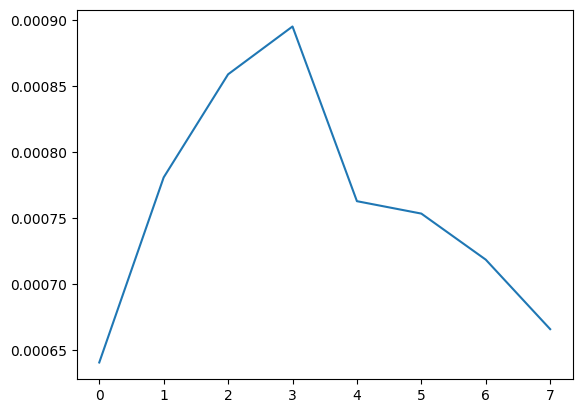

In [17]:
a = 1
b=1
means = []
for i in np.arange(1, 80, 10):
    model = HiPPO_LegT(N=i, dt = 1/len(x), teacher_ratio=1, trainable=False)
    prediction = np.array(model(y.reshape(1,-1))).reshape(-1,)
    # print(x[a+1:-b].shape, prediction[a:-1-b].shape)
    # plt.plot(x[a+1:-b], y[a+1:-b])
    error = np.abs(y_np[a+1:-b] - prediction[a:-1-b])

    plt.plot(x[a+1:-b], error, label = f"{i}")
    means.append(np.mean(error))
plt.legend()
plt.show()
plt.plot(means)

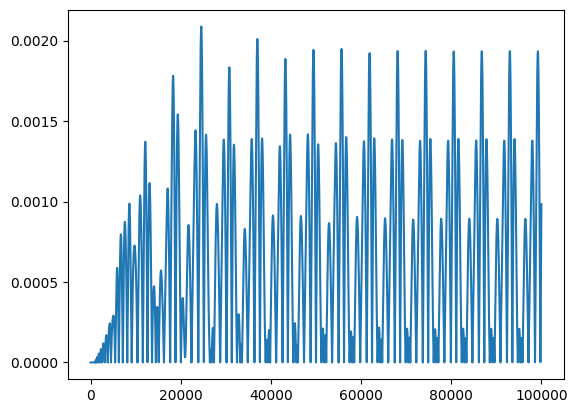

In [10]:
errors = []
for i in np.arange(1, 60, 4):
    model = HiPPO_FouT(N=i, dt = 1/len(x), teacher_ratio=1, trainable=False)
    prediction = model(y.reshape(-1,1)).reshape(-1,)
    # plt.plot(x[1:], y[1:])
    # plt.plot(x[1:], prediction[:-1])
    plt.show()
    # print(y.shape)
    # print(prediction.shape)
    error = torch.abs(prediction[:-1] - y[1:])
    errors.append(error[-1])

In [11]:
1/len(x)

1e-05

In [12]:
print(model.D_discr)

tensor([1.0011])


In [14]:
errors

[tensor(0.0110),
 tensor(0.0691),
 tensor(0.1490),
 tensor(0.2291),
 tensor(0.3089),
 tensor(0.3890),
 tensor(0.4689),
 tensor(0.5491),
 tensor(0.6290),
 tensor(0.7090),
 tensor(0.7889),
 tensor(0.8691),
 tensor(0.9490),
 tensor(1.0289),
 tensor(1.1091)]

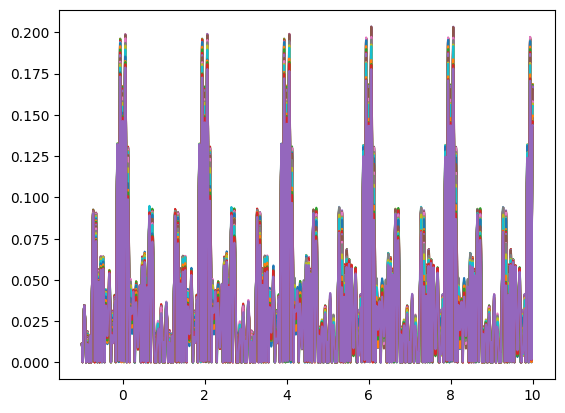

In [132]:
errors_np = np.array(errors)
for i in range(len(N)-int(len(N)/2)):
    plt.plot(x[1:], errors_np[i,:])

In [133]:
error_fouT = np.array([np.mean(errors_np[i,4000:-4000]) for i in range(errors_np.shape[0])])

Text(0, 0.5, 'error')

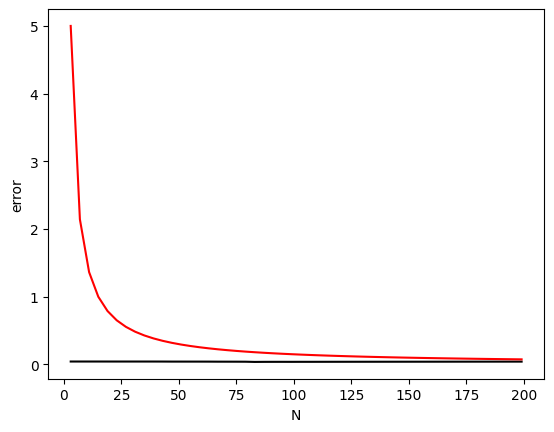

In [134]:
a=0
plt.plot(N[a:], error_fouT[a:], color="black")
plt.plot(N[a:], bound[a:], color="red")
plt.xlabel("N")
plt.ylabel("error")